# Mid-semester assignment - Advanced topics in deep learning
Hello dear students,<br> this is the template notebook. Please upload it into your drive and open as Google Colab nootebook".

---
<br>

### Name and ID:
Student 1:
<br>
Student 2:

## Coffee Bean Classification Project
The project is a classification of images on "coffee bean dataset resized". It is a computer vision project that classifies the coffee beans by looking their colours. There are 4 labels that are Dark, Green, Light and Medium.

<table>
  <tr><td>
    <img src="https://i.pinimg.com/564x/70/24/98/702498e0289cd18be9c160eb81357b30.jpg"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  
</table>



**The Data**<br>
The dataset is labeled into 4 different classes.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Dark</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Green</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Light</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Medium</td>
  </tr>
</table>
<br>


# Goodluck!

## Part 0 -  Utiles

### Import Libraries

In [ ]:
%%capture
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import numpy as np
import os
import pathlib
!pip install -U --no-cache-dir gdown --pre
!gdown --id 1anU5YH4vRueTEF-ZGGDEDvEY4FNfSOjF
!unzip /content/archive.zip


In [ ]:
!gdown --version

gdown 4.7.1 at /usr/local/lib/python3.10/dist-packages


## Part 1 - Data Preprocessing

### Data exploration

How many classes do we have?



In [ ]:
num_of_coffee_bean_classes = len(os.listdir('/content/train'))
print(f'There are {num_of_coffee_bean_classes} different classes')

There are 4 different classes


What are those classes?

In [ ]:
data_dir = pathlib.Path('/content/train')
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(f'Name of classes:\n{class_names}')

Name of classes:
['Dark' 'Green' 'Light' 'Medium']


Let's create a function to visualize images randomly

In [ ]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)
  img = mpimg.imread(target_folder + '/' + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')

  return img

Let's visualize images from all categories



Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)
Image shape: (224, 224, 3)


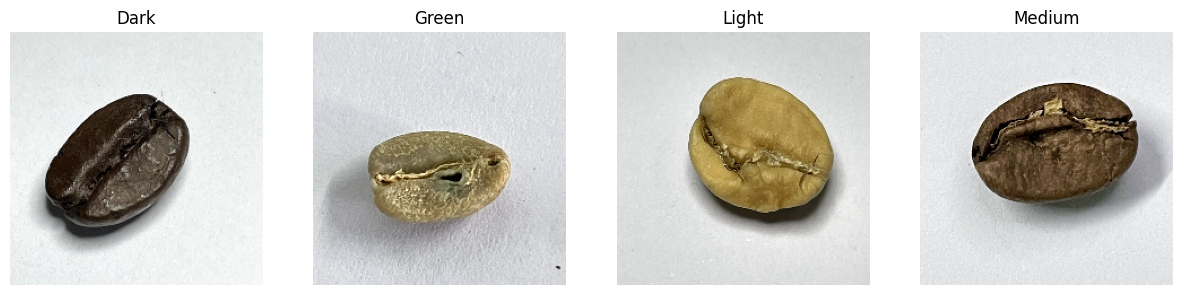

In [ ]:
plt.figure(figsize = (15,7))
plt.subplot(1,4,1)
dark_bean_image = view_random_image('/content/train/', "Dark")
plt.subplot(1,4,2)
green_bean_image = view_random_image('/content/train/', "Green")
plt.subplot(1,4,3)
light_bean_image = view_random_image('/content/train/', "Light")
plt.subplot(1,4,4)
medium_bean_image = view_random_image('/content/train/', "Medium")

Lets's see what the csv file contains

In [ ]:
df = pd.read_csv('/content/Coffee Bean.csv')
df.head()

,class index,filepaths,labels,data set
0,0,train/Dark/dark (1).png,Dark,train
1,0,train/Dark/dark (10).png,Dark,train
2,0,train/Dark/dark (100).png,Dark,train
3,0,train/Dark/dark (101).png,Dark,train
4,0,train/Dark/dark (102).png,Dark,train


**From here you will have to continue on your own. Goodluck!**

**Vars**

In [ ]:
from os import listdir

Train_P = '/content/train'
Test_P = '/content/test'

train_size = 960
val_size= 320
test_size=400

dark = "Dark"
green = "Green"
light = "Light"
med = "Medium"

max_epochs = 10
batch_size = 16

width = 224
height = 224
input_shape = (width, height)

numclasses=4
classes = listdir(Train_P)

cs = pd.read_csv('/content/Coffee Bean.csv')

**Load and process data**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Data Augmentation
data_gen = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2,horizontal_flip=True, validation_split = 0.2)
test_data = ImageDataGenerator(rescale=1/255, shear_range=0.2, zoom_range=0.2,horizontal_flip=True)


# Create ImageDataGenerator instances

train_gen = data_gen.flow_from_directory(Train_P, target_size=input_shape, batch_size=batch_size
                                                    ,class_mode='categorical', classes = classes, subset = 'training', shuffle=False)


validation_gen = data_gen.flow_from_directory(Test_P, target_size = input_shape, batch_size = batch_size,
    class_mode = 'categorical', classes = classes, subset = 'training', shuffle = False)


test_generator = test_data.flow_from_directory(Test_P, target_size=input_shape, batch_size=1,
                                                  class_mode = None, classes = classes, shuffle= False)

Found 960 images belonging to 4 classes.
Found 320 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


**Base Model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model= Sequential()

model.add(Conv2D(32,(3,3), activation='relu', input_shape=(width, height, 3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(numclasses, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

# Train the model
history_base = model.fit(train_gen, epochs=max_epochs, validation_data=validation_gen, verbose=1)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 26, 26, 128)      

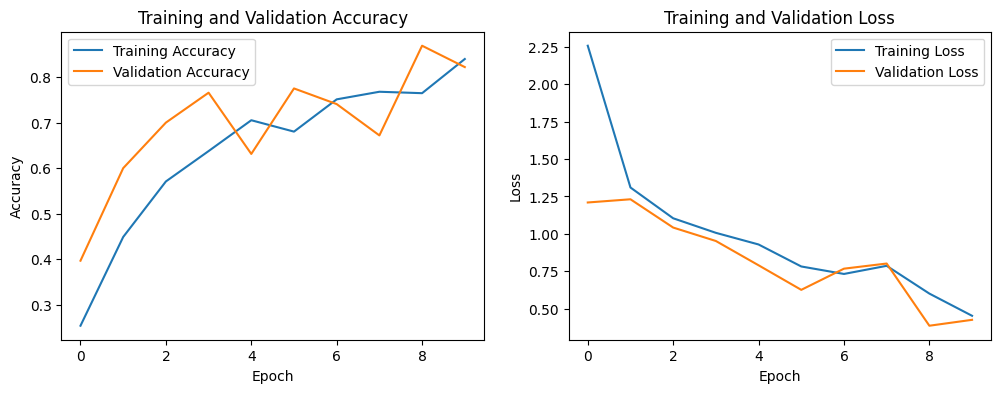

In [ ]:
# Plot training history for accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_base.history['accuracy'], label='Training Accuracy')
plt.plot(history_base.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training history for loss
plt.subplot(1, 2, 2)
plt.plot(history_base.history['loss'], label='Training Loss')
plt.plot(history_base.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

**Exp 1**

In [ ]:
from tensorflow.keras.layers import Dropout

# Build a simplified CNN model for Experiment 1
model_exp1 = Sequential()

model_exp1.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 3)))
model_exp1.add(MaxPooling2D(2, 2))

# Additional Convolutional Layer for Experiment 1
model_exp1.add(Conv2D(64, (3, 3), activation='relu'))
model_exp1.add(MaxPooling2D(2, 2))

model_exp1.add(Flatten())
model_exp1.add(Dense(128, activation='relu'))
model_exp1.add(Dense(numclasses, activation='softmax'))

# Compile the model
model_exp1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model_exp1.summary()

history_exp1_simplified = model_exp1.fit(train_gen, epochs=max_epochs, validation_data=validation_gen, verbose=1)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_31 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_8 (Flatten)         (None, 186624)            0         
                                                                 
 dense_19 (Dense)            (None, 128)              

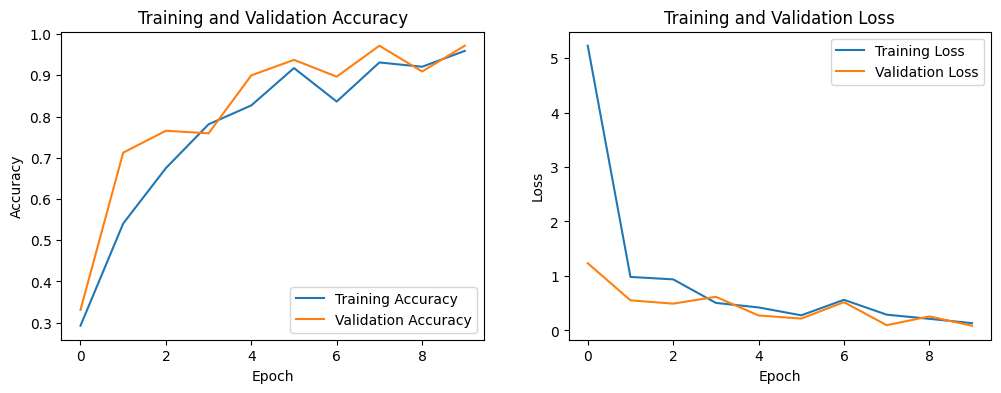

In [ ]:
# Plot training history for accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_exp1_simplified.history['accuracy'], label='Training Accuracy')
plt.plot(history_exp1_simplified.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training history for loss
plt.subplot(1, 2, 2)
plt.plot(history_exp1_simplified.history['loss'], label='Training Loss')
plt.plot(history_exp1_simplified.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

**Exp2**

In [ ]:
from tensorflow.keras.optimizers import Adam

# Build a model for Experiment 2 with hyperparameter changes
model_exp2 = Sequential()

model_exp2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 3)))
model_exp2.add(MaxPooling2D(2, 2))

model_exp2.add(Conv2D(64, (3, 3), activation='relu'))
model_exp2.add(MaxPooling2D(2, 2))

model_exp2.add(Flatten())
model_exp2.add(Dense(128, activation='relu'))
model_exp2.add(Dense(numclasses, activation='softmax'))

# Change hyperparameters for Experiment 2
new_optimizer = Adam(learning_rate=0.0001)  # Change optimizer to Adam with a specific learning rate
new_batch_size = 32  # Change batch size

# Compile the model with new hyperparameters
model_exp2.compile(optimizer=new_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model_exp2.summary()

history_exp2 = model_exp2.fit(train_gen, epochs=max_epochs, validation_data=validation_gen, verbose=1, batch_size=new_batch_size)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_80 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_68 (MaxPooli  (None, 111, 111, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_81 (Conv2D)          (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_69 (MaxPooli  (None, 54, 54, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_23 (Flatten)        (None, 186624)            0         
                                                                 
 dense_49 (Dense)            (None, 128)             

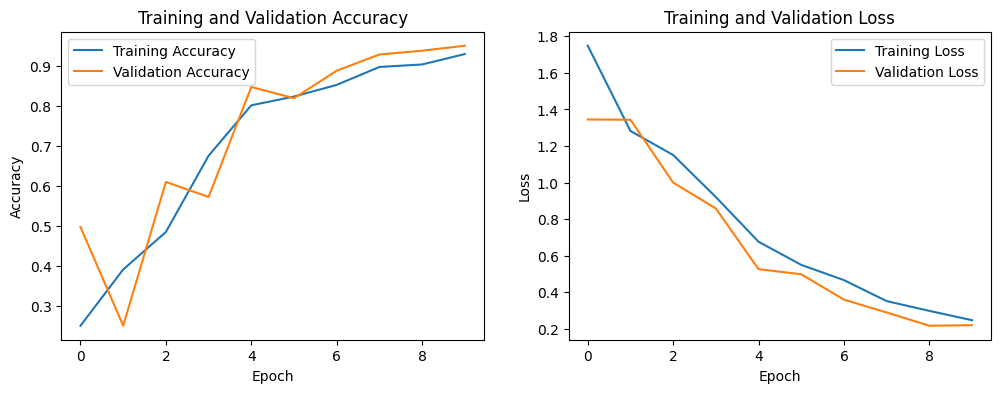

In [ ]:
# Plot training history for accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_exp2.history['accuracy'], label='Training Accuracy')
plt.plot(history_exp2.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training history for loss
plt.subplot(1, 2, 2)
plt.plot(history_exp2.history['loss'], label='Training Loss')
plt.plot(history_exp2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

**Test**

In [ ]:
# Save the weights of the best model
model_exp1.save_weights('/content/model_exp1_w.h5')

1/1 [==============================] - 0s 73ms/step


/content/test/Green/green (16).png

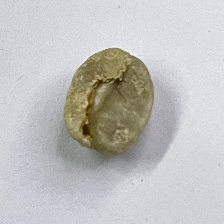

Predicted Class: Green


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

# Function to preprocess the image and make predictions
def predict_coffee_bean(image_path, model):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(width, height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale to [0, 1]

    # Make prediction
    predictions = model.predict(img_array)
    predicted_class = classes[np.argmax(predictions)]

    # Display the image
    display(FileLink(image_path))
    display(img)

    # Print the prediction
    print(f'Predicted Class: {predicted_class}')

# Example usage
predict_coffee_bean('/content/test/Green/green (16).png', model_exp1)

1/1 [==============================] - 0s 46ms/step


/content/test/Light/light (76).png

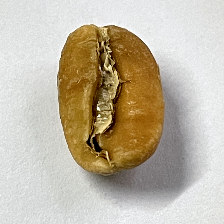

Correct Class: Light
Predicted Class: Light
1/1 [==============================] - 0s 46ms/step


/content/test/Medium/medium (57).png

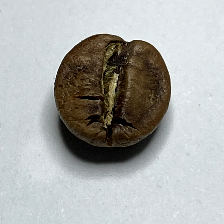

Correct Class: Medium
Predicted Class: Medium
1/1 [==============================] - 0s 55ms/step


/content/test/Green/green (29).png

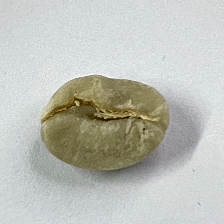

Correct Class: Green
Predicted Class: Green
1/1 [==============================] - 0s 46ms/step


/content/test/Dark/dark (53).png

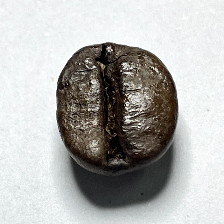

Correct Class: Dark
Predicted Class: Dark


In [ ]:
# Function to preprocess the image and make predictions
def predict_coffee_bean_random(model):
    # Loop through each class folder
    for coffee_class in classes:
        # Generate a random number between 1 and 100
        random_number = generate_random_number()

        # Create the image path with the correct case
        image_path = f'/content/test/{coffee_class}/{coffee_class.lower()} ({random_number}).png'

        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(width, height))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0  # Rescale to [0, 1]

        # Make prediction
        predictions = model.predict(img_array)
        predicted_class = classes[np.argmax(predictions)]

        # Display the image
        display(FileLink(image_path))
        display(img)

        # Print the correct class
        print(f'Correct Class: {coffee_class}')

        # Print the predicted class
        print(f'Predicted Class: {predicted_class}')

# Example usage
predict_coffee_bean_random(model_exp1)